# Пособие по использованию блока data_exchanger

Данное пособие научит вас быстро и удобно вводить свои данные в python для последующей обработки.

## Оглавление

1. [__Функция read_data__](#Функция-read_data) Считывание Excel и csv
    
    
2. [__Функция shredder__](#Функция-shredder) Разбиение листа с данными на таблички
    - [Обязательные параметры:](#Обязательные-параметры-(shredder):)
    - [Дополнительные параметры:](#Дополнительные-параметры-(shredder):)
    - [Выходящие данные:](#Выходящие-данные-(shredder):)
    
3. [__Функции получения погрешности из данных__](#Функции-получения-погрешности-из-данных) Конвертация из `DataFrame` в GroupVar
    1. [__Функция get_into_groupvar_col_to_col__](#Функция-get_into_groupvar_col_to_col)
        - [Обязательные параметры:](#Обязательные-параметры-(get_into_groupvar_col_to_col):)
        - [Выходящие данные:](#Выходящие-данные-(get_into_groupvar_col_to_col):)
        
    2. [__Функция get_into_groupvar_col_named__](#Функция-get_into_groupvar_col_named)
        - [Обязательные параметры:](#Обязательные-параметры-(get_into_groupvar_col_named):)
        - [Выходящие данные:](#Выходящие-данные-(get_into_groupvar_col_named):)
        
    3. [__Функция get_into_groupvar_col_last_err__](#Функция-get_into_groupvar_col_last_err)
        - [Обязательные параметры:](#Обязательные-параметры-(get_into_groupvar_col_last_err):)
        - [Выходящие данные:](#Выходящие-данные-(get_into_groupvar_col_last_err):)
    
    
    
4. [__Функция quick_use_form__](#Функция-quick_use_form) Упрощение использования данных
    - [Обязательные параметры:](#Обязательные-параметры-(quick_use_form):)
    - [Дополнительные параметры:](#Дополнительные-параметры-(quick_use_form):)
    
    
5. [__Функция show_df__](#Функция-show_df) Красивый вывод DataFrame
    - [Обязательные параметры:](#Обязательные-параметры-(show_df):)
    
    

## Функция read_data

Эта функция является основной при вводе данных, отвечает за открытие Excel или csv файлов. Показывает обычное окно Windows для выбора файла. Выводит DataFrame со всем полученным листом.


Примерно так будет выглядеть окно

<div>
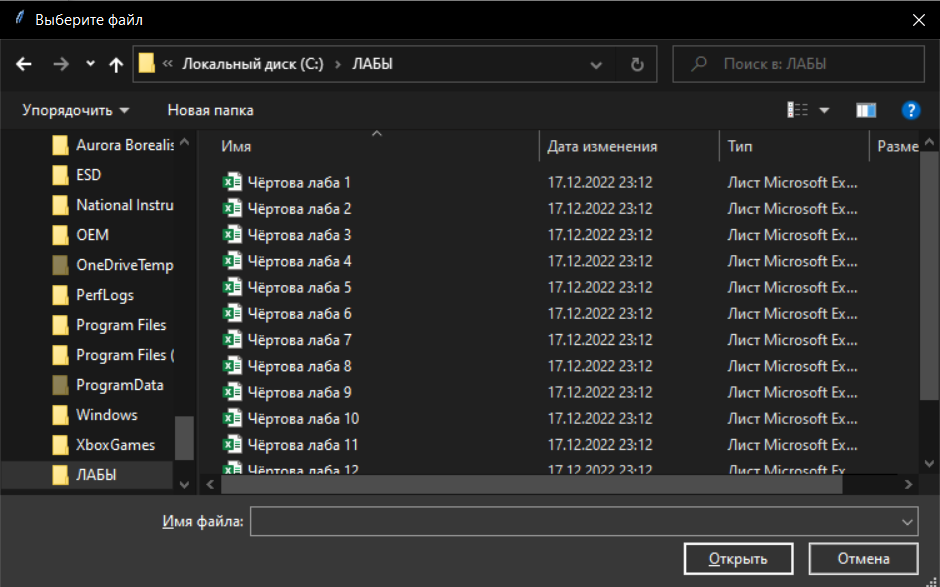
</div>

In [2]:
from lab_cheat import *
read_data()

,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,"Len, см",10.0,2.0
2,NaN,N,"t, с","Т, с",NaN,"arg, Н",15.0,3.0
3,NaN,10,43.71,4.371,NaN,"angl, rad",0.5,0.1
4,NaN,10,43.31,4.331,NaN,NaN,NaN,NaN
5,NaN,10,43.67,4.367,NaN,NaN,NaN,NaN
6,NaN,10,43.61,4.361,NaN,NaN,NaN,NaN
7,NaN,10,43.87,4.387,NaN,NaN,NaN,NaN
8,NaN,10,43.92,4.392,NaN,NaN,NaN,NaN
9,NaN,10,43.91,4.391,NaN,NaN,NaN,NaN


## Функция shredder

Данная функция отвечает за "нарезку" всего листа (обычно результат работы функции [__read_data__](#Функция-read_data)). Определяет строки с константами в файле и таблицы, выдаёт константы отдельно, таблицы - отдельно.

__Важно!__ Для корректной работы данной функции необходимо, чтобы ячейки в Excel файле были правильно определены, т. е. числа хранились в ячейках числового формата, а названия столбцов или констант были текстового формата.

### Обязательные параметр (shredder):

- __dataf__ - Ваш лист, объект класса pandas.DataFrame, рекомендуется использовать результат работы [__read_data__](#Функция-read_data)

### Дополнительные параметры (shredder):

- __show_result__ - Логическое значение, нужно ли вывести таблицы, на которые был поделен файл (True - выведется, False - нет)

### Выходящие данные (shredder):

Данная фанкция возвращает через запятую словарь с константами, ключи - названия ваших констант вместе с погрешностью, а значения - объекты класса Var, т. е. значение + погрешность.

### Пример 1  (shredder):

Наша таблица Excel имеет вид:
<div>
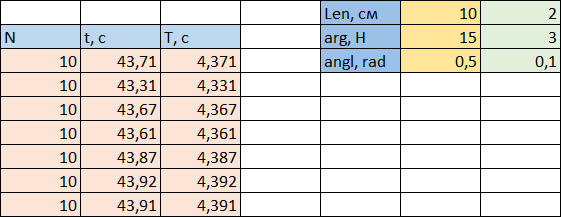
</div>

Тут голубые ячейки - названия столбцов таблицы, а кремовый - значения столбцов. А справа - формат таблицы, когда мы хотим передать константы, т. е. величины, общие для всех или большинства измерений. Синие ячейки - названия констант, рекомендуется делать их не очень длинными, так как потом вы будете пользоваться этими названиями при написании кода. Жёлтые ячейки - значения констант, а светло-зелёные - погрешности к соответствующей константе, если погрешности нет, нужно писать 0.

Введём данные и посмотрим результат работы:

{'Len, см': ~10.0, 'arg, Н': ~15.0, 'angl, rad': ~0.5}


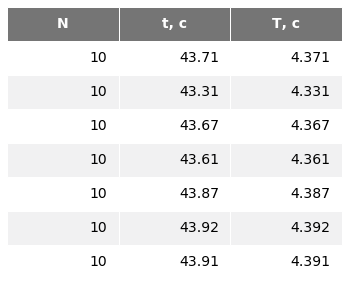

In [4]:
constants, data = shredder(read_data(), True)

### Пример 2 (shredder):

Теперь рассмотрим такую таблицу:


<div>
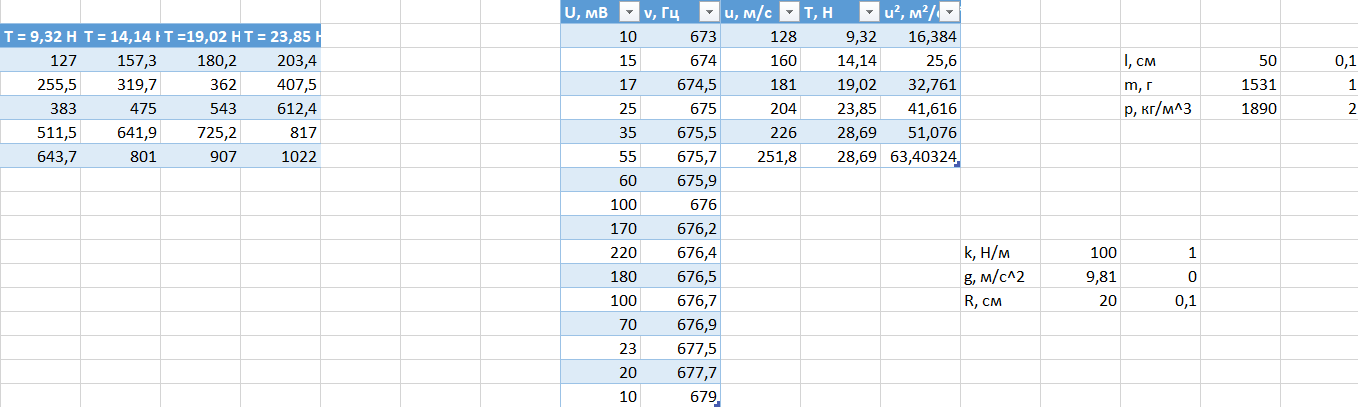
</div>


Заметим, что теперь у нас 2 "блока" констант и 2 таблицы будто слиплись. В этом случае так как строки таблиц не имеют смысла и не несут никакой информации, так что такие таблицы будут поделены на две, прочие случаи "кривого" слипания тоже будут раздроблены.

{'l, см': ~50.0, 'm, г': ~1531.0, 'p, кг/м^3': ~1890.0, 'k, Н/м': ~100.0, 'g, м/с^2': ~9.81, 'R, см': ~20.0}


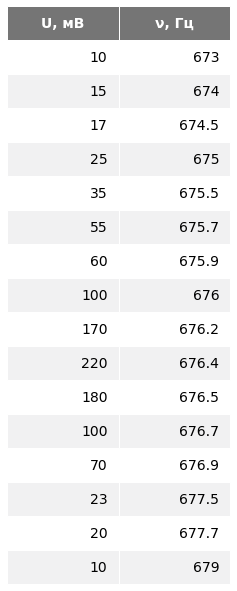

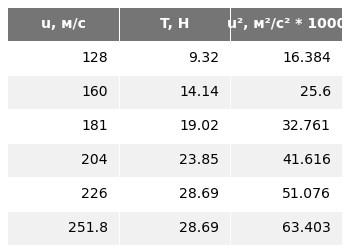

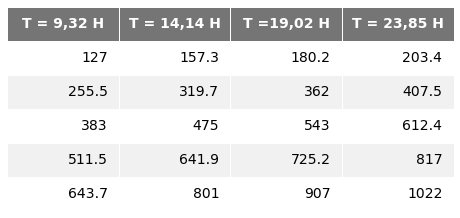

In [2]:
constants, data = shredder(read_data(), True)

## Функции получения погрешности из данных

На данный момент существуют 3 функции, выполняющие данную функцию:

### Функция get_into_groupvar_col_to_col

Формат ввода погрешностей в форме _столбец к столбцу_. Данная функция требует, чтобы каждому столбцу значений соответствовал столбец погрешностей для каждого измерения.

Такой способ ввода данных может быть удобен в случае, если для каждого отдельного измерения своя погрешность.

### Обязательные параметры (get_into_groupvar_col_to_col):

- __data_frame__ - Аккуратно вырезанная табличка в формате DataFrame, обычно используется результат работы программы [__shredder__](#Функция-shredder). Таблица должна иметь следующий формат:

<div>
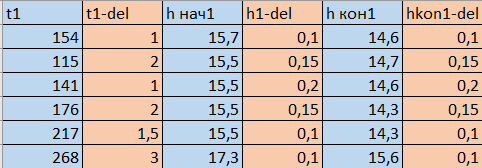
</div>

Данная функция просто к каждому столбцу записывает в качестве погрешности следующий. Синие столбцы - значения, оранжевые - погрешности. Требует, чтобы к __каждому__ столбцу был _компаньон_ с погрешностью.

### Выходящие данные (get_into_groupvar_col_to_col):

Возвращает словарь, ключами которого являются названия столбцов со значениями, а значения по ключам - объекты класса GroupVar, то есть ваши столбцы с уже вшитой погрешностью.

In [1]:
c, data = shredder(read_data())
get_into_groupvar_col_to_col(data[0])

{'t1': ['~154.0', '~115.0', '~141.0', '~176.0', '~217.0', '~268.0'],
 'h нач1': ['~15.7', '~15.5', '~15.5', '~15.5', '~15.5', '~17.3'],
 'h кон1': ['~14.6', '~14.7', '~14.6', '~14.3', '~14.3', '~15.6']}

### Функция get_into_groupvar_col_named

Своего рода аналог [__get_into_groupvar_col_to_col__](#Функция-get_into_groupvar_col_to_col). Только сделан для случая, когда погрешности есть не у всех столбцов. Для того, чтобы дать понять программе, что следующий столбец должен быть столбцом с погрешностью, начните его название с `delta` и далее неважно, что вы напишете, программа запишет его как погрешность к предыдущему.

### Обязательные параметры (get_into_groupvar_col_named):

- __data_frame__ - Аккуратно вырезанная табличка в формате DataFrame, обычно используется результат работы программы [__shredder__](#Функция-shredder). Таблица должна иметь следующий формат:

<div>
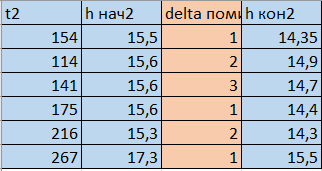
</div>

Как видите, у этой таблицы лишь один стобец с погрешностью, так что 2 остальных столбца значений останутся с нулевой погрешностью, цвета аналогичны предудщему пункту.

### Выходящие данные (get_into_groupvar_col_named):

Возвращает словарь, ключами которого являются названия столбцов со значениями, а значения по ключам - объекты класса GroupVar, то есть ваши столбцы с уже вшитой погрешностью.

In [1]:
c, data = shredder(read_data())
get_into_groupvar_col_named(data[0])

{'t2': ['~154.0', '~114.0', '~141.0', '~175.0', '~216.0', '~267.0'],
 'h нач2': ['~15.5', '~15.6', '~15.6', '~15.6', '~15.3', '~17.3'],
 'h кон2': ['~14.35', '~14.9', '~14.7', '~14.4', '~14.3', '~15.5']}

### Функция get_into_groupvar_col_last_err

Функция, реализующая ввод погрешности по последнему значению, то есть последняя строка в таблице должна быть строкой с погрешностями. Удобен, если погрешности для всех измерений внутри одного столбца одинаковы.

### Обязательные параметры (get_into_groupvar_col_last_err):

- __data_frame__ - Аккуратно вырезанная табличка в формате DataFrame, обычно используется результат работы программы [__shredder__](#Функция-shredder). Таблица должна иметь следующий формат:

<div>
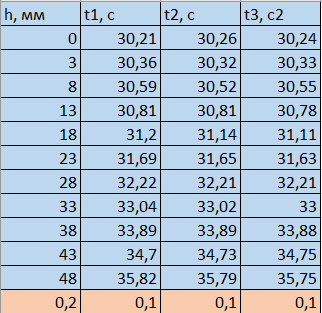
</div>


В данной таблице последняя строка является погрешностью для всех столбцов, эта погрешность будет записана каждому элементу GroupVar

### Выходящие данные (get_into_groupvar_col_last_err):

Возвращает словарь, ключами которого являются названия столбцов со значениями, а значения по ключам - объекты класса GroupVar, то есть ваши столбцы с уже вшитой погрешностью.

In [2]:
c, data = shredder(read_data())
get_into_groupvar_col_last_err(data[0])

{'h, мм': ['~0.0', '~3.0', '~8.0', '~13.0', '~18.0', '~23.0', '~28.0', '~33.0', '~38.0', '~43.0'],
 't1, с': ['~30.21', '~30.36', '~30.59', '~30.81', '~31.2', '~31.69', '~32.22', '~33.04', '~33.89', '~34.7'],
 't2, с': ['~30.26', '~30.32', '~30.52', '~30.81', '~31.14', '~31.65', '~32.21', '~33.02', '~33.89', '~34.73'],
 't3, с2': ['~30.24', '~30.33', '~30.55', '~30.78', '~31.11', '~31.63', '~32.21', '~33.0', '~33.88', '~34.75']}

## Функция quick_use_form

Данная функция помогает ускорить написание формул в программе. Для чего она делает 2 вещи:
- Отбрасывает размерности из всех ключей словаря
- Генирирует строки для явной инициализации переменных

Благодаря ручной явной инициализации переменных становится возможным написание формул так же, как и в обычных задачах, то есть без дополнительного обращения по ключу.

__Важно!__ Во избежании ошибок не делайте названий ваших столбцов системными именами python вроде lambda, and и т. д.

### Обязательные параметры (quick_use_form):

- __dictionary__ - Словарь с данными, который необходимо сделать легкоиспользуемым, обычно является результатом работы одной из программ [блока](#Функции-получения-погрешности-из-данных).

### Дополнительные параметры (quick_use_form):

- __name_dct__ - Название объекта с данными в вашей программе, то есть если вы сложили данные в словарь `data`, то необходимо передать "data". __Важно!__ Данный объект должен быть строкой с названием объекта, а не объектом! 
Используется для генерации строк для явной инициализации переменных. Если передан и не `None`, то строки для явной задачи будут выводиться.


- __index__ - Не может быть передан, если __name_dct__ не передан. Используется в случае, если словарь с вашими данными хранится в итерируемом объекте, например в списке, тогда как __name_dct__ передаётся название списка, а в этот параметр - индекс оъекта в списке.

Для примера воспользуемся результатом работы примера к 
[get_into_groupvar_col_last_err](#Выходящие-данные-(get_into_groupvar_col_last_err):)

In [9]:
c, data = shredder(read_data())
table1 = [get_into_groupvar_col_last_err(data[0])] # Добавляем в список, чтобы продемонстрировать работу параметра index
table1[0] = quick_use_form(table1[0], "table1", 0)
table1

h, t1, t2, t3 = table1[0]['h'], table1[0]['t1'], table1[0]['t2'], table1[0]['t3']


[{'h, мм': ['~0.0', '~3.0', '~8.0', '~13.0', '~18.0', '~23.0', '~28.0', '~33.0', '~38.0', '~43.0'],
  't1, с': ['~30.21', '~30.36', '~30.59', '~30.81', '~31.2', '~31.69', '~32.22', '~33.04', '~33.89', '~34.7'],
  't2, с': ['~30.26', '~30.32', '~30.52', '~30.81', '~31.14', '~31.65', '~32.21', '~33.02', '~33.89', '~34.73'],
  't3, с2': ['~30.24', '~30.33', '~30.55', '~30.78', '~31.11', '~31.63', '~32.21', '~33.0', '~33.88', '~34.75'],
  'h': ['~0.0', '~3.0', '~8.0', '~13.0', '~18.0', '~23.0', '~28.0', '~33.0', '~38.0', '~43.0'],
  't1': ['~30.21', '~30.36', '~30.59', '~30.81', '~31.2', '~31.69', '~32.22', '~33.04', '~33.89', '~34.7'],
  't2': ['~30.26', '~30.32', '~30.52', '~30.81', '~31.14', '~31.65', '~32.21', '~33.02', '~33.89', '~34.73'],
  't3': ['~30.24', '~30.33', '~30.55', '~30.78', '~31.11', '~31.63', '~32.21', '~33.0', '~33.88', '~34.75']}]

Тут вы можете видеть, что функция сгенерировала и вывела строку, которую нужно просто вставить в свой код после её работы и вы явно зададите переменные, так же она добавила в исходный словарь ещё ключи + значения с укороченным ключом.

### Функция show_df

Данная функция решает проблему вывода таблицы для проверки корректности работы программы, так как `print` плохо работает с DataFrame, используйте эту функцию. Она строит таблицы на движке `matplotlib` и выводит в отдельное окошко.

### Обязательные параметры (show_df):

- __df__ - DataFrame, который нужно вывести.

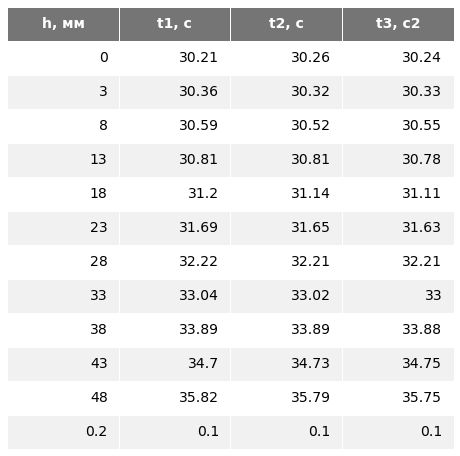

In [10]:
c, data = shredder(read_data())
show_df(data[0])